In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [20]:
df = pd.read_csv("/Users/jannah/Downloads/Housing.csv")
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [21]:
print(df['mainroad'].dtypes)

object


In [22]:
for column in df.columns:
    if df[column].dtype == object and column != "furnishingstatus":
        df[column] = df[column].astype(bool)
    elif column == "furnishingstatus" :
        df_ohe = pd.get_dummies(df['furnishingstatus'],prefix='furnishingstatus')
        df = pd.concat([df.drop('furnishingstatus',axis=1),df_ohe],axis=1)
    

df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,True,True,True,True,True,2,True,True,False,False
1,12250000,8960,4,4,4,True,True,True,True,True,3,True,True,False,False
2,12250000,9960,3,2,2,True,True,True,True,True,2,True,False,True,False
3,12215000,7500,4,2,2,True,True,True,True,True,3,True,True,False,False
4,11410000,7420,4,1,2,True,True,True,True,True,2,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,True,True,True,True,True,2,True,False,False,True
541,1767150,2400,3,1,1,True,True,True,True,True,0,True,False,True,False
542,1750000,3620,2,1,1,True,True,True,True,True,0,True,False,False,True
543,1750000,2910,3,1,1,True,True,True,True,True,0,True,True,False,False


In [23]:
df.dtypes

price                              int64
area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
mainroad                            bool
guestroom                           bool
basement                            bool
hotwaterheating                     bool
airconditioning                     bool
parking                            int64
prefarea                            bool
furnishingstatus_furnished          bool
furnishingstatus_semi-furnished     bool
furnishingstatus_unfurnished        bool
dtype: object

In [ ]:
df_housing = df[["price","area"]]
df_housing[["area"]]

,area
0,7420
1,8960
2,9960
3,7500
4,7420
...,...
540,3000
541,2400
542,3620
543,2910


NameError: name 'df_housing' is not defined

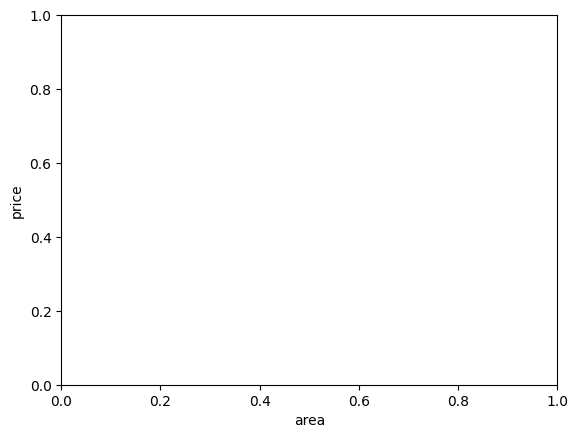

In [ ]:
%matplotlib inline
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df_housing.area,df_housing.price,color='red',marker='+')
plt.plot(df_housing.area,reg.predict(df[["area"]]))

In [14]:
reg = linear_model.LinearRegression()

reg.fit(df_housing[["area"],],df_housing.price)

LinearRegression()

In [20]:
reg.predict([[3300]])
m = reg.coef_
c = reg.intercept_

/Users/jannah/Machine Learning/myenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [7]:
#doing a multivariant regression

print(np.any(df.isna()))
df.columns

False


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'price', 'area', 'bedrooms', 'bathrooms',
       'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [25]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
                         'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                         'parking', 'prefarea', 'furnishingstatus_furnished',
                         'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']],df.price)

LinearRegression()

In [26]:
new_data = {
    'area': [1500, 2000, 1800],
    'bedrooms': [2, 3, 2],
    'bathrooms': [1, 2, 2],
    'stories': [1, 2, 2],
    'mainroad': [True, False, True],
    'guestroom': [False, True, False],
    'basement': [False, True, False],
    'hotwaterheating': [False, True, True],
    'airconditioning': [True, False, True],
    'parking': [1, 1, 1],
    'prefarea': [True, False, True],
    'furnishingstatus_furnished': [False, True, False],
    'furnishingstatus_semi-furnished': [True, False, False],
    'furnishingstatus_unfurnished': [False, False, True]
}

new_data = pd.DataFrame(new_data)
new_data



new_features = new_data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
                         'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                         'parking', 'prefarea', 'furnishingstatus_furnished',
                         'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]
   
prediction = reg.predict(new_features.values)

/Users/jannah/Machine Learning/myenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
prediction

reg.coef_

array([ 3.19352344e+02,  1.47960105e+05,  1.09688140e+06,  5.35718044e+05,
        1.74622983e-10,  0.00000000e+00, -1.13686838e-13,  0.00000000e+00,
        0.00000000e+00,  3.39628754e+05,  0.00000000e+00,  2.89934843e+05,
        8.49735336e+04, -3.74908376e+05])

In [ ]:
reg.intercept_

82094.03114244808

In [ ]:
prediciton = pd.DataFrame(prediction)

AttributeError: 'DataFrame' object has no attribute 'pd'

reg = linear_model.LinearRegression()
reg.fit(df[["area"],["bedrooms"],["bathrooms"],["stories"],[]])